In [1]:
import pandas as pd

tt_df = pd.read_csv("data/titanic/train.csv")

tt_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
gender_df = tt_df.Sex.value_counts()
gender_df

male      577
female    314
Name: Sex, dtype: int64

In [67]:
gender_survivd = pd.crosstab(tt_df.Survived, tt_df.Sex, margins=True)
gender_survivd.head()

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Two way table: are we related in any way? are they dependent?

In [10]:
import numpy as np
gender_exp = np.zeros([2,2])

In [11]:
for i in range(2):
    for j in range(2):
        gender_exp[i, j] = gender_survivd.iloc[i, 2] * gender_survivd.iloc[2,j] / gender_survivd.iloc[2,2]
gender_exp

array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]])

In [13]:
gender_exp_df = pd.DataFrame(gender_exp , index= [0, 1], columns = ["female", "male"])
gender_exp_df.head()

,female,male
0,193.474747,355.525253
1,120.525253,221.474747


In [19]:
gender_diff = gender_survivd.iloc[:2,:2].subtract(gender_exp_df)
gender_diff = gender_diff **2 
gender_diff.divide(gender_exp)

Sex,female,male
Survived,,
0,65.386150,35.582757
1,104.961977,57.119690


In [22]:
chi2 = gender_diff.values.sum()
chi2

50602.27527803286

In [23]:
df = (2-1) * (2-1)

In [24]:
gender_survivd.head()

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [29]:
gender_survivd_df = gender_survivd.copy()
gender_survivd_df['female_ratio'] = gender_survivd_df.female.apply(lambda x:  x / gender_survivd_df.iloc[2,0] )
gender_survivd_df['male_ratio'] = gender_survivd_df.male.apply(lambda x:  x / gender_survivd_df.iloc[2,1] )
gender_survivd_df.head()

Sex,female,male,All,female_ratio,male_ratio
Survived,,,,,
0,81,468,549,0.257962,0.811092
1,233,109,342,0.742038,0.188908
All,314,577,891,1.000000,1.000000


In [30]:
se = np.sqrt(gender_survivd_df.iloc[0,3] * gender_survivd_df.iloc[1,3] / gender_survivd_df.iloc[2,0] + gender_survivd_df.iloc[0,4] * gender_survivd_df.iloc[1,4] / gender_survivd_df.iloc[2,1] )

In [31]:
se

0.0295830868168562

In [34]:
p_diff = gender_survivd_df.iloc[1,3] - gender_survivd_df.iloc[1,4]

In [35]:
rg = [p_diff - 2* se , p_diff + 2* se]

In [36]:
rg

[0.4939638973462079, 0.6122962446136326]

In [37]:
# 90% confident that the ratio female survived [0.4939638973462079, 0.6122962446136326] more than male.

In [71]:
def relu(a):
    return [  1  if x <=0.1else 0 for x in a]

k = [sum(relu(np.random.rand(62))) for i in range(10000)]

In [72]:
sum([1 if x <=3 else 0 for x in k])

1207

In [73]:
#mean = 0 and miu=1
#x**2 +x2**2,  10,000

freedom=1


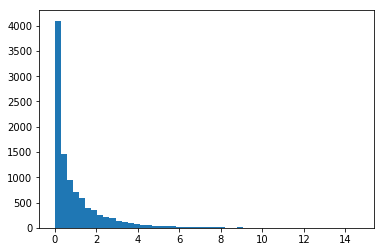

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
chi = [sum(np.random.normal(size=1)**2) for i in range(10000)]
plt.hist(chi, bins=50)
print("freedom=1")

freedom=2


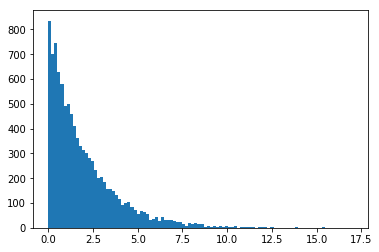

In [69]:
chi = [sum(np.random.normal(size=2)**2) for i in range(10000)]
plt.hist(chi, bins=100)
print("freedom=2")

freedom=10


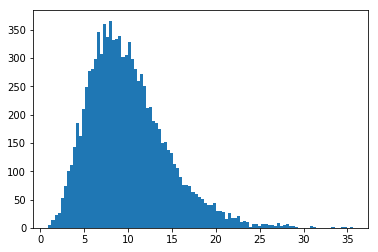

In [70]:
chi = [sum(np.random.normal(size=10)**2) for i in range(10000)]
plt.hist(chi, bins=100)
print("freedom=10")

In [ ]:
import scipy

In [ ]:
beta gamma chi2 ->    mcmc -> gibbs sampling -> LDA  